<h1><center>Final Project:</center></h1>
<h1><center>Solving a Second Order Ordinary Differential Equation</center></h1>
<h2><center>Alisha Hodgin</center></h2>
<h4><center>University of Central Oklahoma, Department of Engineering and Physics</center></h4>
<h5><center>Computational Methods in Engineering, Fall 2021</center></h5>

## Importing Libraries for the Notebook & Defining Runge Kutta Constants

In [3]:
#IMPORT LIBRARIES
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#CLASSICAL RK CONSTANTS
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2 
a4 = 1
b21 = 1./2
b31 = 0
b32 = 1./2
b41 = 0
b42 = 0
b43 = 1

<h1><center>Part I</center></h1>

<h3><center>$\large \ddot x + 2 \zeta \omega_n \dot x + {\omega}_n^2 x = \frac{F(t)}{m}$</center></h3>

<h5><center> Write python code that uses RK 4th order to solve the ODE above. For the first part of the project, you will assume F(t) is zero. Later you will be using F(t), so plan accordingly.Test your code with all three unforced cases - overdamping, critically damped, and underdamping. You will choose the values of $\omega_n$ and $\zeta$. You will need to demonstrate your code works over a range of time-step sizes for all cases. Code and graphics are required. You should calculate and verify that both $x(t)$ and $v(t)$ can reliably be calculated using Runge-Kutta by numerically and graphically comparing the analytical solutions and the calculated values from your RK program.</center></h5>

## Overdamped, Homogenous System

CONDITIONS: 


- $\zeta > \sqrt{\zeta^2 - 1}$


- $c > c_c$ therefore $\zeta > 1$


- $ \frac{F(t)}{m} = 0$

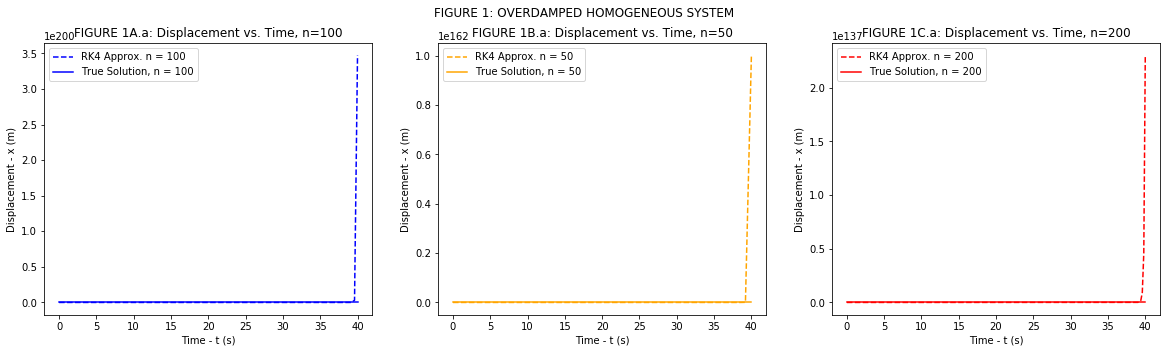

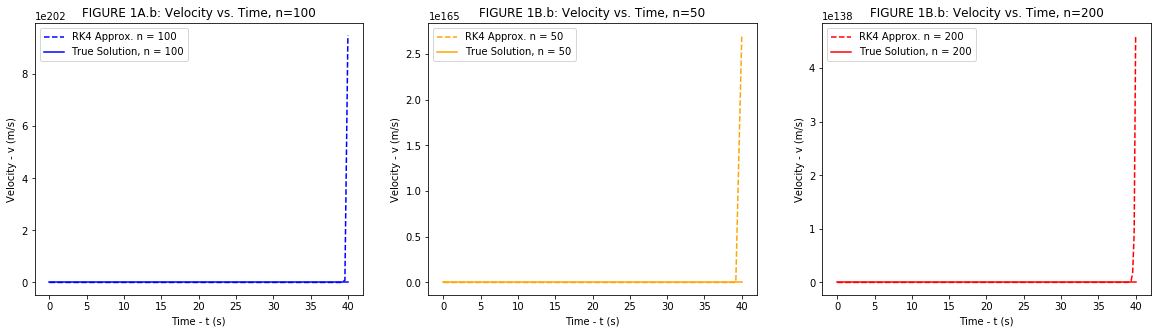

In [13]:
###########################################################################################################################
#APPROXIMATE SOLUTION
###########################################################################################################################
#SYSTEM CONSTANTS
zeta = 10
wn = 1   #in rad/s

#LAMBDA FUNCTIONS
    #Note:
        #t is independent
        #x is dependent
        #v is dependent

#Fom dependent on t
Fom = lambda t: 0     

#fx dependent on v
#dx/dt, gives x vs t
fx = lambda t,x,v: v

#fv dependent on v and x
    #only dependent on t because Fom is t-dependent
#dv/dt, gives v vs t
fv = lambda t,x,v: (Fom(t) - (2*zeta*wn*v) - (x*pow(wn,2)))


#RUNGE KUTTA FUNCTIONS
    #Note:
        #need RK function for each ODE
        #do not need RK function for F_over_m

#x is primary dependent variable, will change
#v is also dependent, but will not change for this function
def RK4_x(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*dt, xi+b21*K1*dt, vi)
    K3 = fx(ti+a3*dt, xi+b31*K1*dt+b32*K2*dt, vi)
    K4 = fx(ti+a4*dt, xi+b41*K1*dt+b42*K2*dt+b43*K3*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return xip1

#v is primary dependent variable, will change
#x is also dependent, but will not change for this function
def RK4_v(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*dt, xi, vi+b21*K1*dt)
    K3 = fv(ti+a3*dt, xi, vi+b31*K1*dt+b32*K2*dt)
    K4 = fv(ti+a4*dt, xi, vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return vip1


#INITIAL CONDITIONS & TIME STEP
tiv = 0 #initial time, in s
tfv = 40 #final time, in s
xiv = 1 #initial position, in m
viv = 0 #initial velocity, in m/s

#TIMESTEP 1
n1 = 100  #number of steps
dt1 = (tfv-tiv)/n1 #step size, in s
t1 = np.zeros(n1+1)
x1 = np.zeros(n1+1)
v1 = np.zeros(n1+1)
t1[0] = tiv
x1[0] = xiv
v1[0] = viv
for i in range(1,n1+1):
    t1[i] = t1[i-1]+dt1
    x1[i] = RK4_x(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)
    v1[i] = RK4_v(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)

#TIMESTEP 2
n2 = 50
dt2 = (tfv-tiv)/n2
t2 = np.zeros(n2+1)
x2 = np.zeros(n2+1)
v2 = np.zeros(n2+1)
t2[0] = tiv
x2[0] = xiv
v2[0] = viv
for i in range(1,n2+1):
    t2[i] = t2[i-1]+dt2
    x2[i] = RK4_x(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    v2[i] = RK4_v(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    
#TIMESTEP 3
n3 = 200
dt3 = (tfv-tiv)/n3
t3 = np.zeros(n3+1)
x3 = np.zeros(n3+1)
v3 = np.zeros(n3+1)
t3[0] = tiv
x3[0] = xiv
v3[0] = viv
for i in range(1,n3+1):
    t3[i] = t3[i-1]+dt3
    x3[i] = RK4_x(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    v3[i] = RK4_v(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
     
###########################################################################################################################
#EXACT SOLUTION
###########################################################################################################################
#FUNCTIONS
#x_t and v_t defined for x(0) = 1 and v(0) = 0
def x_t(lam1, lam2, t):
    diff1 = lam1 - lam2
    diff2 = lam2 - lam1
    diff3 = lam2 - (2*lam1)
    return (diff3/diff2)*exp(lam1*t) + (lam1/diff1)*exp(lam2*t)
def v_t(lam1, lam2, t):
    diff1 = lam1 - lam2
    diff2 = lam2 - lam1
    diff3 = lam2 - (2*lam1)
    prod1 = lam1*diff3
    prod2 = lam2*lam1
    return (prod1/diff2)*exp(lam1*t) + (prod2/diff1)*exp(lam2*t)

lam1 = -wn*(zeta - wn*sqrt(pow(zeta,2) - 1))
lam2 = -wn*(zeta + wn*sqrt(pow(zeta,2) - 1))

#TIMESTEP 1
x_TS1 = np.zeros(n1+1)
v_TS1 = np.zeros(n1+1)
x_TS1[0] = xiv
v_TS1[0] = viv

for j in range(1,n1+1):
    x_TS1[j] = x_t(lam1,lam2,t1[j-1])
    v_TS1[j] = v_t(lam1,lam2,t1[j-1])
    
#TIMESTEP 2
x_TS2 = np.zeros(n2+1)
v_TS2 = np.zeros(n2+1)
x_TS2[0] = xiv
v_TS2[0] = viv

for j in range(1,n2+1):
    x_TS2[j] = x_t(lam1,lam2,t2[j-1])
    v_TS2[j] = v_t(lam1,lam2,t2[j-1])
    
#TIMESTEP 3
x_TS3 = np.zeros(n3+1)
v_TS3 = np.zeros(n3+1)
x_TS3[0] = xiv
v_TS3[0] = viv

for j in range(1,n3+1):
    x_TS3[j] = x_t(lam1,lam2,t3[j-1])
    v_TS3[j] = v_t(lam1,lam2,t3[j-1])
    
###########################################################################################################################
#GRAPHICAL ANALYSIS
###########################################################################################################################
#x vs t
plt.figure(figsize = (20,5)) #(width,length)
plt.suptitle("FIGURE 1: OVERDAMPED HOMOGENEOUS SYSTEM\n\n\n\n")
plt.subplot(1,3,1)
plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t1,x_TS1,c='blue',linestyle='solid') #true solution, dt1
plt.title("FIGURE 1A.a: Displacement vs. Time, n=100",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 100","True Solution, n = 100"],loc = "upper left")

plt.subplot(1,3,2)
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t2,x_TS2,c='orange',linestyle='solid') #true solution, dt2
plt.title("FIGURE 1B.a: Displacement vs. Time, n=50",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 50","True Solution, n = 50"],loc = "upper left")

plt.subplot(1,3,3)
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.plot(t3,x_TS3,c='red',linestyle='solid') #true solution, dt3
plt.title("FIGURE 1C.a: Displacement vs. Time, n=200",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 200","True Solution, n = 200"],loc = "upper left")
plt.show()

#v vs t 
plt.figure(figsize = (20,5)) #(width,length)
plt.subplot(1,3,1)
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t1,v_TS1,c='blue',linestyle='solid') #true solution, dt1
plt.title("FIGURE 1A.b: Velocity vs. Time, n=100",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 100","True Solution, n = 100"],loc = "upper left")

plt.subplot(1,3,2)
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t2,v_TS2,c='orange',linestyle='solid') #true solution, dt2
plt.title("FIGURE 1B.b: Velocity vs. Time, n=50",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 50","True Solution, n = 50"],loc = "upper left")

plt.subplot(1,3,3)
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.plot(t3,v_TS3,c='red',linestyle='solid') #true solution, dt3
plt.title("FIGURE 1B.b: Velocity vs. Time, n=200",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 200","True Solution, n = 200"],loc = "upper left")
plt.show()

###########################################################################################################################
#NUMERICAL ANALYSIS
###########################################################################################################################

#PERCENT ERROR & PERCENT DIFFERENCE
per_err = lambda aprx,TS: abs((aprx - TS)/TS)*100

per_diff = lambda aprx,TS: (abs(aprx - TS)/(.5*(aprx + TS)))*100

#CALCULATE FOR TIMESTEP 1
#per_err_dt1 = np.zeros()
#for i in range(0,n1+1):
    



## Critically Damped, Homogenous System

CONDITIONS: 


- $\sqrt{\zeta^2 - 1} = 0$


- $c = c_c$ therefore $\zeta = 1$


- $ \frac{F(t)}{m} = 0$

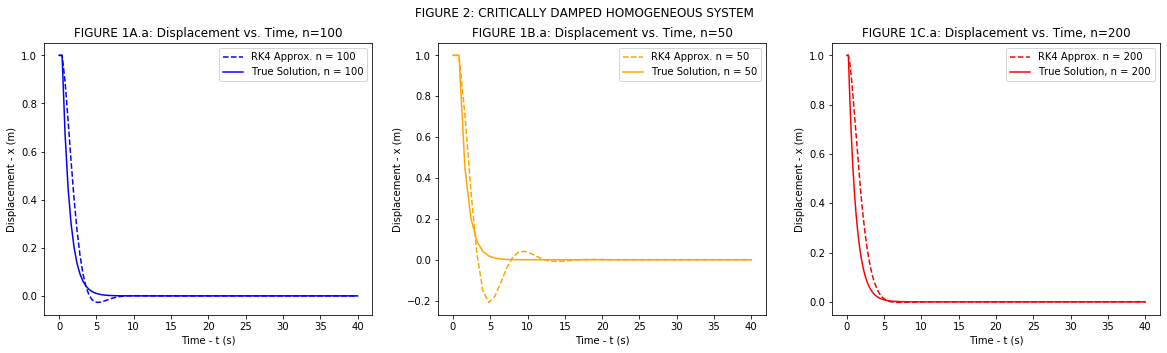

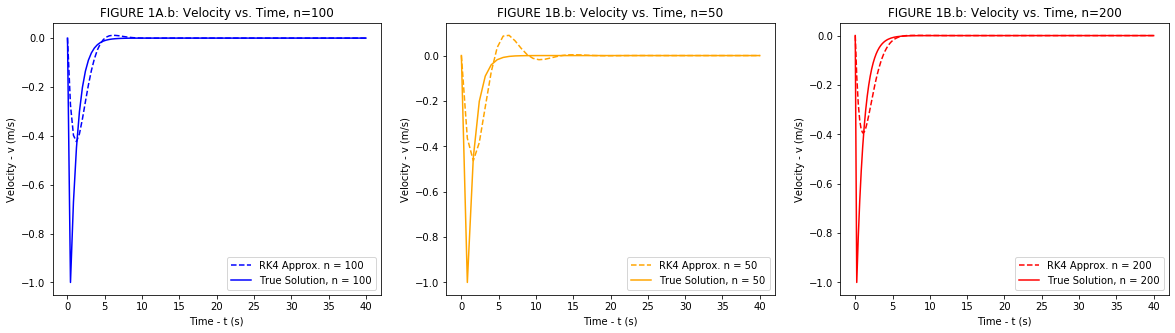

In [21]:
###########################################################################################################################
#APPROXIMATE SOLUTION
###########################################################################################################################
#SYSTEM CONSTANTS
zeta = 1
wn = 1   #in rad/s

#LAMBDA FUNCTIONS
    #Note:
        #t is independent
        #x is dependent
        #v is dependent

#Fom dependent on t
Fom = lambda t: 0     

#fx dependent on v
#dx/dt, gives x vs t
fx = lambda t,x,v: v

#fv dependent on v and x
    #only dependent on t because Fom is t-dependent
#dv/dt, gives v vs t
fv = lambda t,x,v: (Fom(t) - (2*zeta*wn*v) - (x*pow(wn,2)))


#RUNGE KUTTA FUNCTIONS
    #Note:
        #need RK function for each ODE
        #do not need RK function for F_over_m
        
#x is primary dependent variable, will change
#v is also dependent, but will not change for this function
def RK4_x(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*dt, xi+b21*K1*dt, vi)
    K3 = fx(ti+a3*dt, xi+b31*K1*dt+b32*K2*dt, vi)
    K4 = fx(ti+a4*dt, xi+b41*K1*dt+b42*K2*dt+b43*K3*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return xip1

#v is primary dependent variable, will change
#x is also dependent, but will not change for this function
def RK4_v(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*dt, xi, vi+b21*K1*dt)
    K3 = fv(ti+a3*dt, xi, vi+b31*K1*dt+b32*K2*dt)
    K4 = fv(ti+a4*dt, xi, vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return vip1


#INITIAL CONDITIONS & TIME STEP
tiv = 0 #initial time, in s
tfv = 40 #final time, in s
xiv = 1 #initial position, in m
viv = 0 #initial velocity, in m/s

#TIMESTEP 1
n1 = 100  #number of steps
dt1 = (tfv-tiv)/n1 #step size, in s
t1 = np.zeros(n1+1)
x1 = np.zeros(n1+1)
v1 = np.zeros(n1+1)
t1[0] = tiv
x1[0] = xiv
v1[0] = viv
for i in range(1,n1+1):
    t1[i] = t1[i-1]+dt1
    x1[i] = RK4_x(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)
    v1[i] = RK4_v(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)

#TIMESTEP 2
n2 = 50
dt2 = (tfv-tiv)/n2
t2 = np.zeros(n2+1)
x2 = np.zeros(n2+1)
v2 = np.zeros(n2+1)
t2[0] = tiv
x2[0] = xiv
v2[0] = viv
for i in range(1,n2+1):
    t2[i] = t2[i-1]+dt2
    x2[i] = RK4_x(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    v2[i] = RK4_v(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    
#TIMESTEP 3
n3 = 200
dt3 = (tfv-tiv)/n3
t3 = np.zeros(n3+1)
x3 = np.zeros(n3+1)
v3 = np.zeros(n3+1)
t3[0] = tiv
x3[0] = xiv
v3[0] = viv
for i in range(1,n3+1):
    t3[i] = t3[i-1]+dt3
    x3[i] = RK4_x(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    v3[i] = RK4_v(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    
###########################################################################################################################
#EXACT SOLUTION
###########################################################################################################################
#FUNCTIONS
#x_t and v_t defined for x(0) = 1 and v(0) = 0
def x_t(wn,t):
    return exp(-wn*t)
def v_t(wn,t):
    return -wn*exp(-wn*t)

lam1 = -wn*(zeta - wn*sqrt(pow(zeta,2) - 1))
lam2 = -wn*(zeta + wn*sqrt(pow(zeta,2) - 1))

#TIMESTEP 1
x_TS1 = np.zeros(n1+1)
v_TS1 = np.zeros(n1+1)
x_TS1[0] = xiv
v_TS1[0] = viv

for j in range(1,n1+1):
    x_TS1[j] = x_t(wn,t1[j-1])
    v_TS1[j] = v_t(wn,t1[j-1])
    
#TIMESTEP 2
x_TS2 = np.zeros(n2+1)
v_TS2 = np.zeros(n2+1)
x_TS2[0] = xiv
v_TS2[0] = viv

for j in range(1,n2+1):
    x_TS2[j] = x_t(wn,t2[j-1])
    v_TS2[j] = v_t(wn,t2[j-1])
    
#TIMESTEP 1
x_TS3 = np.zeros(n3+1)
v_TS3 = np.zeros(n3+1)
x_TS3[0] = xiv
v_TS3[0] = viv

for j in range(1,n3+1):
    x_TS3[j] = x_t(wn,t3[j-1])
    v_TS3[j] = v_t(wn,t3[j-1])

###########################################################################################################################
#GRAPHICAL ANALYSIS
###########################################################################################################################
#x vs t
plt.figure(figsize = (20,5)) #(width,length)
plt.suptitle("FIGURE 2: CRITICALLY DAMPED HOMOGENEOUS SYSTEM\n\n\n\n")
plt.subplot(1,3,1)
plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t1,x_TS1,c='blue',linestyle='solid') #true solution, dt1
plt.title("FIGURE 1A.a: Displacement vs. Time, n=100",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 100","True Solution, n = 100"],loc = "upper right")

plt.subplot(1,3,2)
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t2,x_TS2,c='orange',linestyle='solid') #true solution, dt2
plt.title("FIGURE 1B.a: Displacement vs. Time, n=50",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 50","True Solution, n = 50"],loc = "upper right")

plt.subplot(1,3,3)
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.plot(t3,x_TS3,c='red',linestyle='solid') #true solution, dt3
plt.title("FIGURE 1C.a: Displacement vs. Time, n=200",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 200","True Solution, n = 200"],loc = "upper right")
plt.show()

#v vs t 
plt.figure(figsize = (20,5)) #(width,length)
plt.subplot(1,3,1)
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t1,v_TS1,c='blue',linestyle='solid') #true solution, dt1
plt.title("FIGURE 1A.b: Velocity vs. Time, n=100",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 100","True Solution, n = 100"],loc = "lower right")

plt.subplot(1,3,2)
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t2,v_TS2,c='orange',linestyle='solid') #true solution, dt2
plt.title("FIGURE 1B.b: Velocity vs. Time, n=50",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 50","True Solution, n = 50"],loc = "lower right")

plt.subplot(1,3,3)
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.plot(t3,v_TS3,c='red',linestyle='solid') #true solution, dt3
plt.title("FIGURE 1B.b: Velocity vs. Time, n=200",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 200","True Solution, n = 200"],loc = "lower right")
plt.show()


## Underdamped, Homogenous System

CONDITIONS: 


- $\sqrt{\zeta^2 - 1} < 1$


- $c < c_c$ therefore $\zeta < 1$


- $\omega_d = \omega_n\sqrt{1-\zeta^2}$ therefore $\lambda = -\zeta w_n \pm i\omega_d$


- $ \frac{F(t)}{m} = 0$

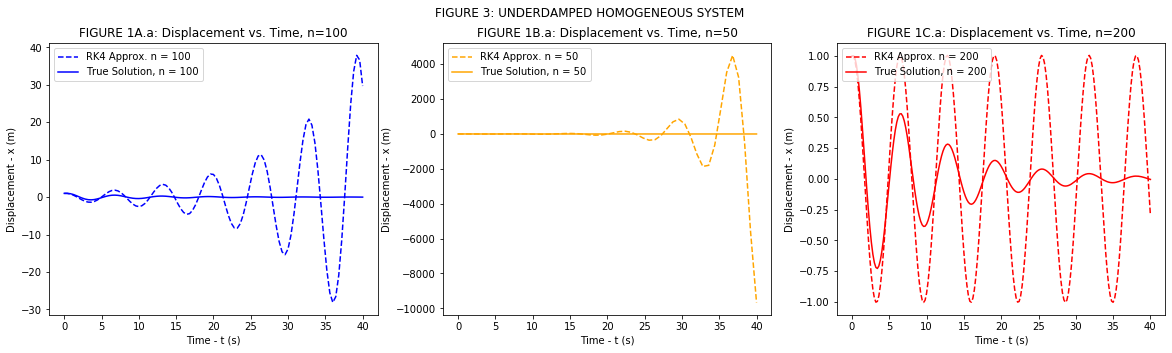

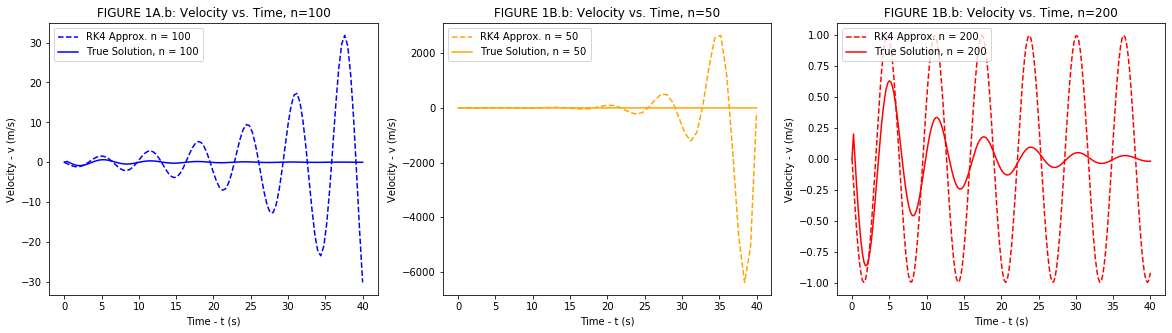

In [20]:
###########################################################################################################################
#APPROXIMATE SOLUTION
###########################################################################################################################
#SYSTEM CONSTANTS
zeta = .1
wn = 1   #in rad/s
wd = wn*sqrt(1-pow(zeta,2)) #in rad/s

#LAMBDA FUNCTIONS
    #Note:
        #t is independent
        #x is dependent
        #v is dependent

#Fom dependent on t
Fom = lambda t: 0     

#fx dependent on v
#dx/dt, gives x vs t
fx = lambda t,x,v: v

#fv dependent on v and x
    #only dependent on t because Fom is t-dependent
#dv/dt, gives v vs t
fv = lambda t,x,v: (Fom(t) - (2*zeta*wn*v) - (x*pow(wn,2)))


#RUNGE KUTTA FUNCTIONS
    #Note:
        #need RK function for each ODE
        #do not need RK function for F_over_m
        
#x is primary dependent variable, will change
#v is also dependent, but will not change for this function
def RK4_x(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*dt, xi+b21*K1*dt, vi)
    K3 = fx(ti+a3*dt, xi+b31*K1*dt+b32*K2*dt, vi)
    K4 = fx(ti+a4*dt, xi+b41*K1*dt+b42*K2*dt+b43*K3*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return xip1

#v is primary dependent variable, will change
#x is also dependent, but will not change for this function
def RK4_v(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*dt, xi, vi+b21*K1*dt)
    K3 = fv(ti+a3*dt, xi, vi+b31*K1*dt+b32*K2*dt)
    K4 = fv(ti+a4*dt, xi, vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return vip1


#INITIAL CONDITIONS & TIME STEP
tiv = 0 #initial time, in s
tfv = 40 #final time, in s
xiv = 1 #initial position, in m
viv = 0 #initial velocity, in m/s

#TIMESTEP 1
n1 = 100  #number of steps
dt1 = (tfv-tiv)/n1 #step size, in s
t1 = np.zeros(n1+1)
x1 = np.zeros(n1+1)
v1 = np.zeros(n1+1)
t1[0] = tiv
x1[0] = xiv
v1[0] = viv
for i in range(1,n1+1):
    t1[i] = t1[i-1]+dt1
    x1[i] = RK4_x(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)
    v1[i] = RK4_v(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)

#TIMESTEP 2
n2 = 50
dt2 = (tfv-tiv)/n2
t2 = np.zeros(n2+1)
x2 = np.zeros(n2+1)
v2 = np.zeros(n2+1)
t2[0] = tiv
x2[0] = xiv
v2[0] = viv
for i in range(1,n2+1):
    t2[i] = t2[i-1]+dt2
    x2[i] = RK4_x(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    v2[i] = RK4_v(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    
#TIMESTEP 3
n3 = 200
dt3 = (tfv-tiv)/n3
t3 = np.zeros(n3+1)
x3 = np.zeros(n3+1)
v3 = np.zeros(n3+1)
t3[0] = tiv
x3[0] = xiv
v3[0] = viv
for i in range(1,n3+1):
    t3[i] = t3[i-1]+dt3
    x3[i] = RK4_x(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    v3[i] = RK4_v(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    
###########################################################################################################################
#EXACT SOLUTION
###########################################################################################################################
#FUNCTIONS
#x_t and v_t defined for x(0) = 1 and v(0) = 0
def x_t(zeta,wn,wd,t):
    ex = -zeta*wn*t
    arg = wd*t
    frac = zeta*(wn/wd)
    return exp(ex)*(cos(arg) + (frac*sin(arg)))
def v_t(zeta,wn,wd,t):
    ex = -zeta*wn*t
    arg = wd*t
    frac = zeta*(wn/wd)
    p1 = (-wd*sin(arg)) + (zeta*wn*cos(arg))
    p2 = frac*((wd*cos(arg)) - (zeta*wn*sin(arg)))
    return exp(ex)*(p1 + p2)

#TIMESTEP 1
x_TS1 = np.zeros(n1+1)
v_TS1 = np.zeros(n1+1)
x_TS1[0] = xiv
v_TS1[0] = viv

for j in range(1,n1+1):
    x_TS1[j] = x_t(zeta,wn,wd,t1[j-1])
    v_TS1[j] = v_t(zeta,wn,wd,t1[j-1])
    
#TIMESTEP 2
x_TS2 = np.zeros(n2+1)
v_TS2 = np.zeros(n2+1)
x_TS2[0] = xiv
v_TS2[0] = viv

for j in range(1,n2+1):
    x_TS2[j] = x_t(zeta,wn,wd,t2[j-1])
    v_TS2[j] = v_t(zeta,wn,wd,t2[j-1])
    
#TIMESTEP 3
x_TS3 = np.zeros(n3+1)
v_TS3 = np.zeros(n3+1)
x_TS3[0] = xiv
v_TS3[0] = viv

for j in range(1,n3+1):
    x_TS3[j] = x_t(zeta,wn,wd,t3[j-1])
    v_TS3[j] = v_t(zeta,wn,wd,t3[j-1])

###########################################################################################################################
#GRAPHICAL ANALYSIS
###########################################################################################################################
#x vs t
plt.figure(figsize = (20,5)) #(width,length)
plt.suptitle("FIGURE 3: UNDERDAMPED HOMOGENEOUS SYSTEM\n\n\n\n")
plt.subplot(1,3,1)
plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t1,x_TS1,c='blue',linestyle='solid') #true solution, dt1
plt.title("FIGURE 1A.a: Displacement vs. Time, n=100",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 100","True Solution, n = 100"],loc = "upper left")

plt.subplot(1,3,2)
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t2,x_TS2,c='orange',linestyle='solid') #true solution, dt2
plt.title("FIGURE 1B.a: Displacement vs. Time, n=50",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 50","True Solution, n = 50"],loc = "upper left")

plt.subplot(1,3,3)
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.plot(t3,x_TS3,c='red',linestyle='solid') #true solution, dt3
plt.title("FIGURE 1C.a: Displacement vs. Time, n=200",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 200","True Solution, n = 200"],loc = "upper left")
plt.show()

#v vs t 
plt.figure(figsize = (20,5)) #(width,length)
plt.subplot(1,3,1)
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t1,v_TS1,c='blue',linestyle='solid') #true solution, dt1
plt.title("FIGURE 1A.b: Velocity vs. Time, n=100",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 100","True Solution, n = 100"],loc = "upper left")

plt.subplot(1,3,2)
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t2,v_TS2,c='orange',linestyle='solid') #true solution, dt2
plt.title("FIGURE 1B.b: Velocity vs. Time, n=50",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 50","True Solution, n = 50"],loc = "upper left")

plt.subplot(1,3,3)
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.plot(t3,v_TS3,c='red',linestyle='solid') #true solution, dt3
plt.title("FIGURE 1B.b: Velocity vs. Time, n=200",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 200","True Solution, n = 200"],loc = "upper left")
plt.show()

<h1><center>Part II</center></h1>

<h5><center>Test your code using values of F(t)/m. You must choose at least three values, two of which may not be constant values of F(t) - i.e. there has to be some time variation of F. You should analyze the results of these tests. If there are known solutions for a given F(t) compare to those. In the end you need to convice the reader (Dr. Lemley) that your code is accurately calculating both x(t) and v(t) for each of these cases. Again, numerical and graphical evidence is required.</center></h5>

## Nonhomogeneous Case #1, Constant F(t)

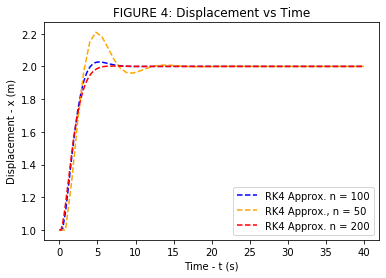

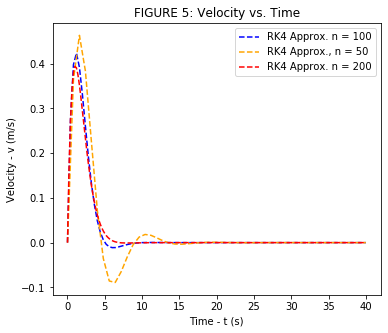

In [19]:
###########################################################################################################################
#APPROXIMATE SOLUTION
###########################################################################################################################
#SYSTEM CONSTANTS
zeta = 1
wn = 1   #in rad/s

#LAMBDA FUNCTIONS
    #Note:
        #t is independent
        #x is dependent
        #v is dependent

#Fom dependent on t
Fom = lambda t: 2     

#fx dependent on v
#dx/dt, gives x vs t
fx = lambda t,x,v: v

#fv dependent on v and x
    #only dependent on t because Fom is t-dependent
#dv/dt, gives v vs t
fv = lambda t,x,v: (Fom(t) - (2*zeta*wn*v) - (x*pow(wn,2)))


#RUNGE KUTTA FUNCTIONS
    #Note:
        #need RK function for each ODE
        #do not need RK function for F_over_m
        
#x is primary dependent variable, will change
#v is also dependent, but will not change for this function
def RK4_x(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*dt, xi+b21*K1*dt, vi)
    K3 = fx(ti+a3*dt, xi+b31*K1*dt+b32*K2*dt, vi)
    K4 = fx(ti+a4*dt, xi+b41*K1*dt+b42*K2*dt+b43*K3*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return xip1

#v is primary dependent variable, will change
#x is also dependent, but will not change for this function
def RK4_v(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*dt, xi, vi+b21*K1*dt)
    K3 = fv(ti+a3*dt, xi, vi+b31*K1*dt+b32*K2*dt)
    K4 = fv(ti+a4*dt, xi, vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return vip1


#INITIAL CONDITIONS & TIME STEP
tiv = 0 #initial time, in s
tfv = 40 #final time, in s
xiv = 1 #initial position, in m
viv = 0 #initial velocity, in m/s

#TIMESTEP 1
n1 = 100  #number of steps
dt1 = (tfv-tiv)/n1 #step size, in s
t1 = np.zeros(n1+1)
x1 = np.zeros(n1+1)
v1 = np.zeros(n1+1)
t1[0] = tiv
x1[0] = xiv
v1[0] = viv
for i in range(1,n1+1):
    t1[i] = t1[i-1]+dt1
    x1[i] = RK4_x(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)
    v1[i] = RK4_v(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)

#TIMESTEP 2
n2 = 50
dt2 = (tfv-tiv)/n2
t2 = np.zeros(n2+1)
x2 = np.zeros(n2+1)
v2 = np.zeros(n2+1)
t2[0] = tiv
x2[0] = xiv
v2[0] = viv
for i in range(1,n2+1):
    t2[i] = t2[i-1]+dt2
    x2[i] = RK4_x(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    v2[i] = RK4_v(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    
#TIMESTEP 3
n3 = 200
dt3 = (tfv-tiv)/n3
t3 = np.zeros(n3+1)
x3 = np.zeros(n3+1)
v3 = np.zeros(n3+1)
t3[0] = tiv
x3[0] = xiv
v3[0] = viv
for i in range(1,n3+1):
    t3[i] = t3[i-1]+dt3
    x3[i] = RK4_x(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    v3[i] = RK4_v(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)

###########################################################################################################################
#GRAPHICAL ANALYSIS
###########################################################################################################################
#x vs t

plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.title("FIGURE 4: Displacement vs Time")
plt.legend(["RK4 Approx. n = 100","RK4 Approx., n = 50","RK4 Approx. n = 200"],loc = "lower right")
plt.show()

#v vs t 
plt.figure(figsize = (20,5)) #(width,length)
plt.subplot(1,3,1)
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.title("FIGURE 5: Velocity vs. Time",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 100","RK4 Approx., n = 50","RK4 Approx. n = 200"],loc = "upper right")
plt.show()


## Nonhomogeneous Case #2, Variable F(t)

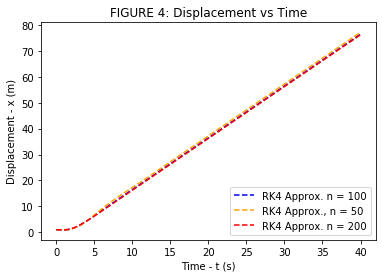

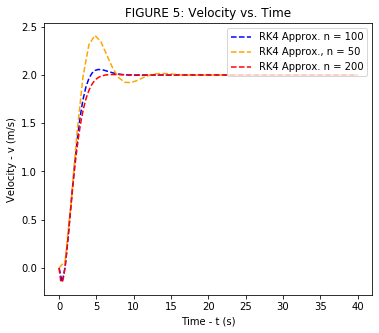

In [22]:
###########################################################################################################################
#APPROXIMATE SOLUTION
###########################################################################################################################
#SYSTEM CONSTANTS
zeta = 1
wn = 1   #in rad/s

#LAMBDA FUNCTIONS
    #Note:
        #t is independent
        #x is dependent
        #v is dependent

#Fom dependent on t
Fom = lambda t: 2*t     

#fx dependent on v
#dx/dt, gives x vs t
fx = lambda t,x,v: v

#fv dependent on v and x
    #only dependent on t because Fom is t-dependent
#dv/dt, gives v vs t
fv = lambda t,x,v: (Fom(t) - (2*zeta*wn*v) - (x*pow(wn,2)))


#RUNGE KUTTA FUNCTIONS
    #Note:
        #need RK function for each ODE
        #do not need RK function for F_over_m
        
#x is primary dependent variable, will change
#v is also dependent, but will not change for this function
def RK4_x(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*dt, xi+b21*K1*dt, vi)
    K3 = fx(ti+a3*dt, xi+b31*K1*dt+b32*K2*dt, vi)
    K4 = fx(ti+a4*dt, xi+b41*K1*dt+b42*K2*dt+b43*K3*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return xip1

#v is primary dependent variable, will change
#x is also dependent, but will not change for this function
def RK4_v(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*dt, xi, vi+b21*K1*dt)
    K3 = fv(ti+a3*dt, xi, vi+b31*K1*dt+b32*K2*dt)
    K4 = fv(ti+a4*dt, xi, vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return vip1


#INITIAL CONDITIONS & TIME STEP
tiv = 0 #initial time, in s
tfv = 40 #final time, in s
xiv = 1 #initial position, in m
viv = 0 #initial velocity, in m/s

#TIMESTEP 1
n1 = 100  #number of steps
dt1 = (tfv-tiv)/n1 #step size, in s
t1 = np.zeros(n1+1)
x1 = np.zeros(n1+1)
v1 = np.zeros(n1+1)
t1[0] = tiv
x1[0] = xiv
v1[0] = viv
for i in range(1,n1+1):
    t1[i] = t1[i-1]+dt1
    x1[i] = RK4_x(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)
    v1[i] = RK4_v(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)

#TIMESTEP 2
n2 = 50
dt2 = (tfv-tiv)/n2
t2 = np.zeros(n2+1)
x2 = np.zeros(n2+1)
v2 = np.zeros(n2+1)
t2[0] = tiv
x2[0] = xiv
v2[0] = viv
for i in range(1,n2+1):
    t2[i] = t2[i-1]+dt2
    x2[i] = RK4_x(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    v2[i] = RK4_v(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    
#TIMESTEP 3
n3 = 200
dt3 = (tfv-tiv)/n3
t3 = np.zeros(n3+1)
x3 = np.zeros(n3+1)
v3 = np.zeros(n3+1)
t3[0] = tiv
x3[0] = xiv
v3[0] = viv
for i in range(1,n3+1):
    t3[i] = t3[i-1]+dt3
    x3[i] = RK4_x(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    v3[i] = RK4_v(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)

###########################################################################################################################
#GRAPHICAL ANALYSIS
###########################################################################################################################
#x vs t

plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.title("FIGURE 4: Displacement vs Time")
plt.legend(["RK4 Approx. n = 100","RK4 Approx., n = 50","RK4 Approx. n = 200"],loc = "lower right")
plt.show()

#v vs t 
plt.figure(figsize = (20,5)) #(width,length)
plt.subplot(1,3,1)
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.title("FIGURE 5: Velocity vs. Time",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 100","RK4 Approx., n = 50","RK4 Approx. n = 200"],loc = "upper right")
plt.show()


## Nonhomogeneous Case #3, Variable F(t)

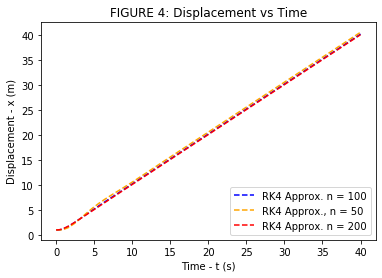

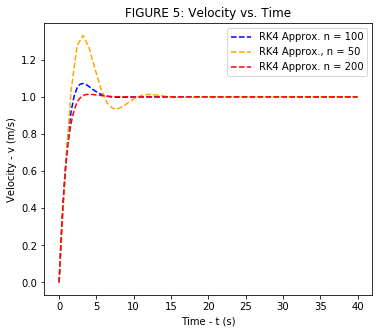

In [25]:
###########################################################################################################################
#APPROXIMATE SOLUTION
###########################################################################################################################
#SYSTEM CONSTANTS
zeta = 1
wn = 1   #in rad/s

#LAMBDA FUNCTIONS
    #Note:
        #t is independent
        #x is dependent
        #v is dependent

#Fom dependent on t
Fom = lambda t: 2+t     

#fx dependent on v
#dx/dt, gives x vs t
fx = lambda t,x,v: v

#fv dependent on v and x
    #only dependent on t because Fom is t-dependent
#dv/dt, gives v vs t
fv = lambda t,x,v: (Fom(t) - (2*zeta*wn*v) - (x*pow(wn,2)))


#RUNGE KUTTA FUNCTIONS
    #Note:
        #need RK function for each ODE
        #do not need RK function for F_over_m
        
#x is primary dependent variable, will change
#v is also dependent, but will not change for this function
def RK4_x(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*dt, xi+b21*K1*dt, vi)
    K3 = fx(ti+a3*dt, xi+b31*K1*dt+b32*K2*dt, vi)
    K4 = fx(ti+a4*dt, xi+b41*K1*dt+b42*K2*dt+b43*K3*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return xip1

#v is primary dependent variable, will change
#x is also dependent, but will not change for this function
def RK4_v(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*dt, xi, vi+b21*K1*dt)
    K3 = fv(ti+a3*dt, xi, vi+b31*K1*dt+b32*K2*dt)
    K4 = fv(ti+a4*dt, xi, vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return vip1


#INITIAL CONDITIONS & TIME STEP
tiv = 0 #initial time, in s
tfv = 40 #final time, in s
xiv = 1 #initial position, in m
viv = 0 #initial velocity, in m/s

#TIMESTEP 1
n1 = 100  #number of steps
dt1 = (tfv-tiv)/n1 #step size, in s
t1 = np.zeros(n1+1)
x1 = np.zeros(n1+1)
v1 = np.zeros(n1+1)
t1[0] = tiv
x1[0] = xiv
v1[0] = viv
for i in range(1,n1+1):
    t1[i] = t1[i-1]+dt1
    x1[i] = RK4_x(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)
    v1[i] = RK4_v(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)

#TIMESTEP 2
n2 = 50
dt2 = (tfv-tiv)/n2
t2 = np.zeros(n2+1)
x2 = np.zeros(n2+1)
v2 = np.zeros(n2+1)
t2[0] = tiv
x2[0] = xiv
v2[0] = viv
for i in range(1,n2+1):
    t2[i] = t2[i-1]+dt2
    x2[i] = RK4_x(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    v2[i] = RK4_v(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    
#TIMESTEP 3
n3 = 200
dt3 = (tfv-tiv)/n3
t3 = np.zeros(n3+1)
x3 = np.zeros(n3+1)
v3 = np.zeros(n3+1)
t3[0] = tiv
x3[0] = xiv
v3[0] = viv
for i in range(1,n3+1):
    t3[i] = t3[i-1]+dt3
    x3[i] = RK4_x(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    v3[i] = RK4_v(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)

###########################################################################################################################
#GRAPHICAL ANALYSIS
###########################################################################################################################
#x vs t

plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.title("FIGURE 4: Displacement vs Time")
plt.legend(["RK4 Approx. n = 100","RK4 Approx., n = 50","RK4 Approx. n = 200"],loc = "lower right")
plt.show()

#v vs t 
plt.figure(figsize = (20,5)) #(width,length)
plt.subplot(1,3,1)
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.title("FIGURE 5: Velocity vs. Time",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 100","RK4 Approx., n = 50","RK4 Approx. n = 200"],loc = "upper right")
plt.show()


<h1><center>Part III</center></h1>

<h5><center>Finally test your code with $F(t)/m = Acos{\omega_f t}$ where you choose the value of $A$. You should vary $\omega_d$ over a range of values such that you can see instances where the oscillations (x(t)) are growing out of control over time (i.e. resonance). Graphically show how this occuring by displaying cases with different $\omega_f$ change the velocity and position over time.</center></h5>

<h1><center>Final Analysis</center></h1>


<b>FOR PART I:</b>

<b>FOR PART II:</b>

<b>FOR PART III:</b>